In [7]:
import numpy as np
import pandas as pd
import h5py
import sys
import matplotlib.pyplot as plt
from statistics import mean
from scipy.optimize import curve_fit
import imageio
from pathlib import Path
import warnings


In [8]:
file_path = '/Users/kirahart/Dropbox/IRCAM_data/june072021/'
name = "face2.h5"

In [14]:
def create_stokes_images(filepath, name, save_path):
    warnings.filterwarnings('ignore')
    #load flux images from HDF5
    hf = h5py.File(file_path+name, 'r')
    I0   = np.array(hf['I0'])
    I135 = np.array(hf['I135'])
    I45  = np.array(hf['I45'])
    I90  = np.array(hf['I90'])
    #calculate stokes parameters
    S0 = (I0+I45+I90+I135)/2
    S1 = (I0-I90)
    S2 = (I45-I135)
    S0a = (I0+I45)
    S0b = (I90+I135)
    
    #set clim for S0 image
    S0mean = np.mean(S0)
    S0std  = np.std(S0)
    dev = 3
    
    s1m = np.max(np.abs(S1/S0))
    s2m = np.max(np.abs(S2/S0))
    
    #AOLP DOLP
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(13, 3), ncols=3)
    # plot just the positive data and save the
    # color "mappable" object returned by ax1.imshow
    pos1 = ax1.imshow(S0, cmap='Greys_r', interpolation='none',vmin=S0mean - dev*S0std, vmax= S0mean + dev*S0std)
    fig.colorbar(pos1, ax=ax1,extend='both',label = "ADU")
    ax1.set_title("$S_0$",fontsize = 20)

    pos2 = ax2.imshow(100*np.sqrt(S1**2+S2**2)/S0, cmap='Greys_r', interpolation='none',vmin=0, vmax=2)
    fig.colorbar(pos2, ax=ax2,extend='both',label = '[%]')
    ax2.set_title("DOLP",fontsize = 20)

    pos3 = ax3.imshow(180/ (2*np.pi*np.arctan2 (S2,S1)), cmap='hsv', interpolation='none',vmin=0, vmax=180)
    fig.colorbar(pos3, ax=ax3,extend='both',label = "[$^\circ$]")
    ax3.set_title("AOLP",fontsize = 20)
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
    plt.show()
    
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(13, 3), ncols=3)

    # STOKES IMAGES
    # color "mappable" object returned by ax1.imshow
    pos1 = ax1.imshow(np.abs(S0a-S0b)/S0, cmap='Greys_r', interpolation='none')
    fig.colorbar(pos1, ax=ax1,extend='both')
    ax1.set_title("$|S_{0,a} - S_{0,b}|/ S_0$",fontsize = 20)
    
    pos2 = ax2.imshow(S1/S0, cmap='bwr', interpolation='none',vmin = -s1m, vmax = s1m)
    fig.colorbar(pos2, ax=ax2,extend='both')
    ax2.set_title("$s_1$",fontsize = 20)

    pos3 = ax3.imshow(S2/S0, cmap='bwr', interpolation='none',vmin = -s2m, vmax = s2m)
    fig.colorbar(pos3, ax=ax3,extend='both')
    ax3.set_title("$s_2$",fontsize = 20)

    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

    plt.show()

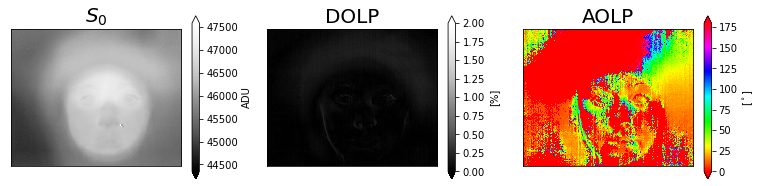

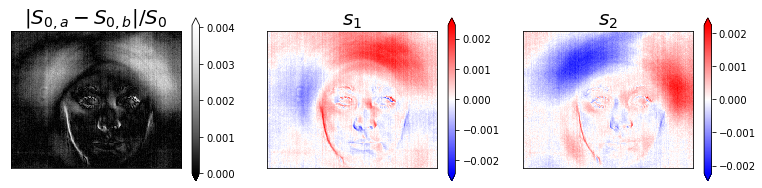

In [15]:
file_path = '/Users/kirahart/Dropbox/IRCAM_data/jun072021/'
save_path = '/Users/kirahart/Dropbox/IRCAM_data/apr122021/imgs/'
name = "face2.h5"

create_stokes_images(file_path, name, save_path)

In [ ]:
def create_stokes_images_withDFC(filepath, name, save_path,darkname,ROI,mask = None):
    warnings.filterwarnings('ignore')
    #load flux images from HDF5
    hf = h5py.File(file_path+name, 'r')
    hfd = h5py.File(file_path+darkname, 'r')
    I0   = np.array(hf['I0'])  -np.array(hfd['I0'])
    I135 = np.array(hf['I135'])-np.array(hfd['I135'])
    I45  = np.array(hf['I45']) -np.array(hfd['I45'])
    I90  = np.array(hf['I90']) -np.array(hfd['I90'])
    #calculate stokes parameters
    S0 = (I0+I45+I90+I135)/2
    S1 = (I0-I90)
    S2 = (I45-I135)
    S0a = (I0+I45)
    S0b = (I90+I135)
    
    #set clim for S0 image
    S0mean = np.mean(S0)
    S0std  = np.std(S0)
    dev = 3
    
    s1m = np.max(np.abs(S1/S0))
    s2m = np.max(np.abs(S2/S0))
    
    #AOLP DOLP
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(13, 3), ncols=3)
    # plot just the positive data and save the
    # color "mappable" object returned by ax1.imshow
    pos1 = ax1.imshow((S0*mask)[ROI[0]:ROI[1],ROI[2]:ROI[3]], cmap='Greys_r', interpolation='none',vmin=S0mean - dev*S0std, vmax= S0mean + dev*S0std)
    fig.colorbar(pos1, ax=ax1,extend='both',label = "ADU")
    ax1.set_title("$S_0$",fontsize = 20)

    pos2 = ax2.imshow(((np.sqrt(100*S1**2+S2**2)/S0)*mask)[ROI[0]:ROI[1],ROI[2]:ROI[3]], cmap='Greys_r', interpolation='none',vmin=0, vmax=.03)
    fig.colorbar(pos2, ax=ax2,extend='both',label = '[%]')
    ax2.set_title("DOLP",fontsize = 20)
    pos2.set_clim(0,3)

    pos3 = ax3.imshow(((180/ np.arctan2(S2,S1))*mask)[ROI[0]:ROI[1],ROI[2]:ROI[3]], cmap='hsv', interpolation='none',vmin=-180, vmax=180)
    fig.colorbar(pos3, ax=ax3,extend='both',label = "[$^\circ$]")
    ax3.set_title("AOLP",fontsize = 20)
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
    plt.show()
    
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(13, 3), ncols=3)

    # STOKES IMAGES
    # color "mappable" object returned by ax1.imshow
    pos1 = ax1.imshow((((np.abs(S0a-S0b)/S0)*mask)[ROI[0]:ROI[1],ROI[2]:ROI[3]]), cmap='Greys_r', interpolation='none')
    fig.colorbar(pos1, ax=ax1,extend='both')
    ax1.set_title("$|S_{0,a} - S_{0,b}|/ S_0$",fontsize = 20)
    pos1.set_clim(-1,1)
    
    pos2 = ax2.imshow(((S1/S0)*mask)[ROI[0]:ROI[1],ROI[2]:ROI[3]], cmap='bwr', interpolation='none',vmin = -s1m, vmax = s1m)
    fig.colorbar(pos2, ax=ax2,extend='both')
    ax2.set_title("$s_1$",fontsize = 20)
    pos2.set_clim(-1,1)

    pos3 = ax3.imshow(((S2/S0)*mask)[ROI[0]:ROI[1],ROI[2]:ROI[3]], cmap='bwr', interpolation='none',vmin = -s2m, vmax = s2m)
    fig.colorbar(pos3, ax=ax3,extend='both')
    ax3.set_title("$s_2$",fontsize = 20)
    pos3.set_clim(-1,1)

    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

    plt.show()

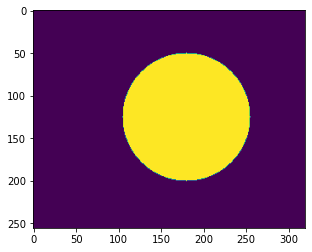

In [113]:
'''create masking function for vignetted FOV'''

def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

mask =create_circular_mask(256,320,[180,125],75);
plt.imshow(mask)
plt.show()
 

In [134]:
file_path = '/Users/kirahart/Dropbox/IRCAM_data/jun072021/'
save_path = '/Users/kirahart/Dropbox/IRCAM_data/jun072021/imgs/'
name = "face5.h5"
darkname = "dark2.h5"
ROI = [75,150,100,200]



In [189]:
file_path = '/Users/kirahart/Dropbox/IRCAM_data/jun072021/'
save_path = '/Users/kirahart/Dropbox/IRCAM_data/apr122021/imgs/'
name = "face5.h5"

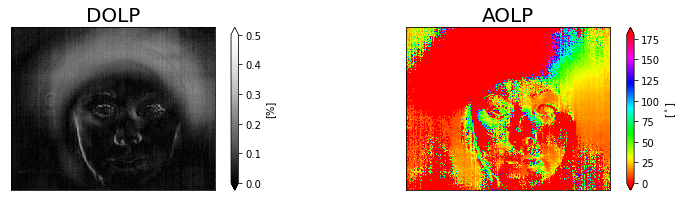

In [16]:
warnings.filterwarnings('ignore')
#load flux images from HDF5
hf = h5py.File(file_path+name, 'r')
I0   = np.array(hf['I0'])
I135 = np.array(hf['I135'])
I45  = np.array(hf['I45'])
I90  = np.array(hf['I90'])
#calculate stokes parameters
S0 = (I0+I45+I90+I135)/2
S1 = (I0-I90)
S2 = (I45-I135)
S0a = (I0+I45)
S0b = (I90+I135)
    
#set clim for S0 image
S0mean = np.mean(S0)
S0std  = np.std(S0)
dev = 3
    
s1m = np.max(np.abs(S1/S0))
s2m = np.max(np.abs(S2/S0))
    
#AOLP DOLP
fig, (ax1, ax2) = plt.subplots(figsize=(13, 3), ncols=2)

pos2 = ax1.imshow(100*np.sqrt(S1**2+S2**2)/S0, cmap='Greys_r', interpolation='none',vmin=0, vmax=0.5)
fig.colorbar(pos2, ax=ax1,extend='both',label = '[%]')
ax1.set_title("DOLP",fontsize = 20)

pos3 = ax2.imshow(180/ (2*np.pi*np.arctan2 (S2,S1)), cmap='hsv', interpolation='none',vmin=-0, vmax=180)
fig.colorbar(pos3, ax=ax2,extend='both',label = "[$^\circ$]")
ax2.set_title("AOLP",fontsize = 20)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.show()
    

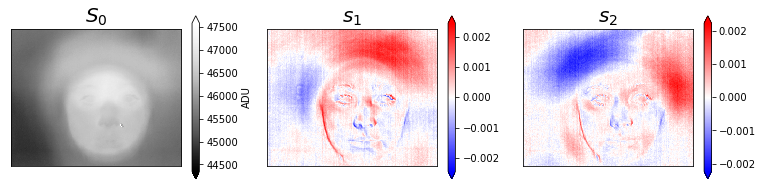

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(13, 3), ncols=3)

pos1 = ax1.imshow(S0, cmap='Greys_r', interpolation='none',vmin=S0mean - dev*S0std, vmax= S0mean + dev*S0std)
fig.colorbar(pos1, ax=ax1,extend='both',label = "ADU")
ax1.set_title("$S_0$",fontsize = 20)

pos2 = ax2.imshow(S1/S0, cmap='bwr', interpolation='none',vmin = -s1m, vmax = s1m)
fig.colorbar(pos2, ax=ax2,extend='both')
ax2.set_title("$s_1$",fontsize = 20)

pos3 = ax3.imshow(S2/S0, cmap='bwr', interpolation='none',vmin = -s2m, vmax = s2m)
fig.colorbar(pos3, ax=ax3,extend='both')
ax3.set_title("$s_2$",fontsize = 20)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

plt.show()